In [36]:
import pandas as pd

In [37]:
# 파일이 많은경우 제일 처음엔 세트 하나를 전처리, 가공 해야함

In [38]:
df = pd.read_excel("./files/kto_total.xlsx")
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [39]:
len(df)

6960

In [40]:
df.info()
# 데이터가 6960개 맞게 잘 들어가잇는지, 갯수가 맞는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        6960 non-null   object 
 1   관광        6960 non-null   int64  
 2   상용        6960 non-null   int64  
 3   공용        6960 non-null   int64  
 4   유학/연수     6960 non-null   int64  
 5   기타        6960 non-null   int64  
 6   계         6960 non-null   int64  
 7   기준년월      6960 non-null   object 
 8   대륙        6960 non-null   object 
 9   관광객비율(%)  6960 non-null   float64
 10  전체비율(%)   6960 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 598.2+ KB


In [41]:
df.describe()
# 마이너스값이 있으면 안되기때문에 확인

,관광,상용,공용,유학/연수,기타,계,관광객비율(%),전체비율(%)
count,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000,6960.000000
mean,14151.834914,310.131178,61.251149,303.418822,3383.024713,18209.660776,62.111940,1.665259
std,52351.026147,1043.723255,250.858698,2116.778318,10269.311046,62120.322558,24.763823,5.915490
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,500.000000,17.000000,1.000000,7.000000,219.000000,953.000000,44.300000,0.100000
50%,1218.500000,50.000000,5.000000,26.000000,611.000000,2235.500000,68.600000,0.100000
75%,5805.000000,225.250000,25.000000,85.000000,1854.250000,9773.750000,80.700000,0.700000
max,823016.000000,25012.000000,3763.000000,44291.000000,137898.000000,917519.000000,100.000000,58.600000


In [42]:
# matplotlib : 시각화를 지원해주는 라이브러리, 많이 있는데 그중에 pyplot을 쓰나봄 . 보편적 약어가 plt
# platform : 내 피씨가 윈도우인지 맥인지 확인하는..

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

#그래프에서 한글 표기를 위한 글자체 변경

if platform.system() == "Windows":
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)

elif platform.system() == "Darwin":  # 맥인 경우 이쪽
    rc("font", family = "AppleGothic")

else:
    print("Check your Os system")

In [43]:
# 중국국적 데이터만 조회 . 필터링!! 연습많이 하라

china = (df["국적"] == "중국")
df_filter = df[china]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


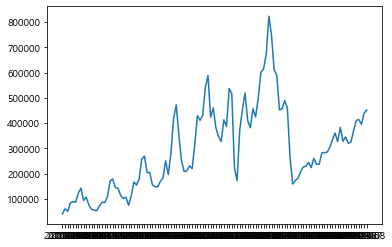

In [44]:
# 연,월,일,시,분,초... 시간적으로 쌓이는 데이터를 시계열 데이터라 하며
# 시간의 흐름에 따라 데이터의 흐름을 본다는 뜻

plt.plot(df_filter["기준년월"], df_filter["관광"])
plt.show()


# plot : 선 그래프를 그리겠다.
# 첫번째 값 : x축 / 관광 : y축
# 이 두개가 교차하는 지점이 점점점으로 이어져..

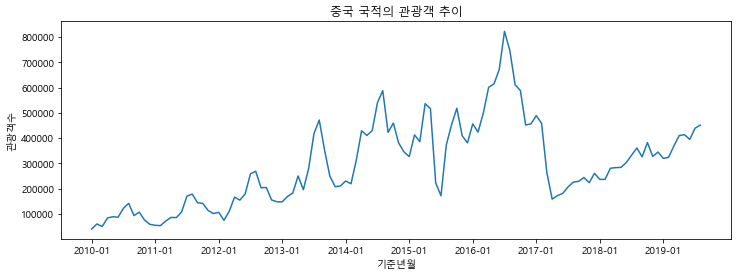

In [54]:
# 그래프 크기 조절
plt.figure(figsize = (12,4)) # (가로값, 세로값)

# 그래프 내용 설정
plt.plot(df_filter["기준년월"], df_filter["관광"]) # 얘만 있어도 그래프 그려짐

# 그래프 타이틀, x축, y축 이름달기
plt.title("중국 국적의 관광객 추이")
plt.xlabel("기준년월")
plt.ylabel("관광객수")

# x축 눈금 값 설정, 리스트로 들어감, 눈금의 범위를 지정하고자 할땐 xticks
plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"])

# 그래프 표현하기
plt.show()

In [74]:
# 우리나라에 방문하는 외국인 관광객이 가장많은 국가 top5를 뽑아라.

df.sort_values(by = "전체비율(%)", ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
4697,중국,823016,4103,354,7122,82924,917519,2016-07,아시아,89.7,58.6
4757,중국,747818,4352,270,35523,85808,873771,2016-08,아시아,85.6,57.0
120,일본,299820,1483,124,519,4180,306126,2010-03,아시아,97.9,55.0
3317,중국,588181,8340,173,23091,137898,757683,2014-08,아시아,77.6,54.3
4337,중국,456636,3723,140,4383,57099,521981,2016-01,아시아,87.5,52.8


In [109]:
# 우리나라에 방문하는 외국인 관광객이 가장많은 국가 top5를 집계하라.
# 집계는 피봇테이블이라 생각하면 될듯하다.

# values: 값x축
# index : y축
# mean : 국적별 전체비율의 평균을 내겠다.
# 전체비율은 퍼센테이지기때문에 합산하면 의미가 없으므로 평균을 씀.
# aggfun : 집계함수. max, min, sum, count, mean 등이 있음.
# sort_values("컬럼명", ascending = False) : 정렬!!! 내림차순 하는거
# .head() : 상위 5개만 보여라.

temp = df.pivot_table(values = "전체비율(%)",
                      index = "국적",
                      aggfunc = "mean").sort_values("전체비율(%)", ascending = False).head()
temp

,전체비율(%)
국적,
중국,32.116379
일본,28.350000
대만,6.650000
미국,6.039655
홍콩,4.645690


In [110]:
# 피봇테이블을 데이터프레임으로 변환하기. ********

temp.reset_index(inplace = True)
#del temp["index"]
#del temp["level_0"]
temp

# 인덱스 없애려면 del 쓰면 된다는데..

,국적,전체비율(%)
0,중국,32.116379
1,일본,28.350000
2,대만,6.650000
3,미국,6.039655
4,홍콩,4.645690


In [96]:
cntry_list = temp["국적"]
cntry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

In [140]:
# 반복문으로 여러 그래프 그리기
# 외국인 관광객이 가장 많은 국가 5개 리스트에 대한 그래프 그리기.

aa = []

for cList in range(len(cntry_list)):
    plt.title( cnt,"국적의 관광객 추이")
    plt.xlabel("기준년월")
    plt.ylabel("전체비율(%)")
    plt.plot(df_filter["국적"], df_filter["전체비율(%)"])
    plt.xticks(["2010-01", "2011-01", "2012-01", "2013-01", "2014-01", "2015-01", "2016-01", "2017-01", "2018-01", "2019-01"])
    cList.append(cntry_list)
    aa.append()
    print(cList)



NameError: name 'cnt' is not defined

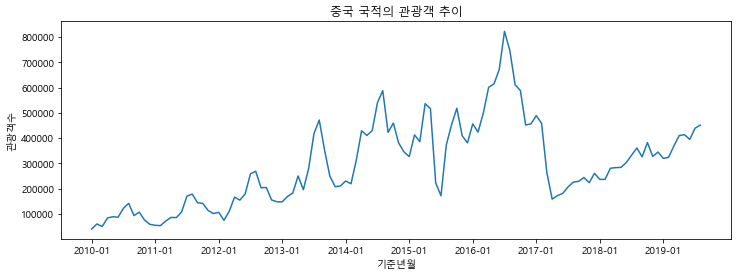

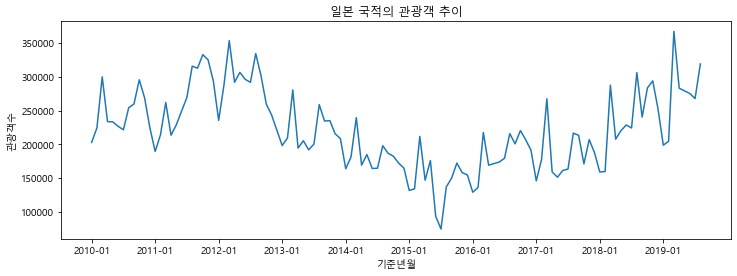

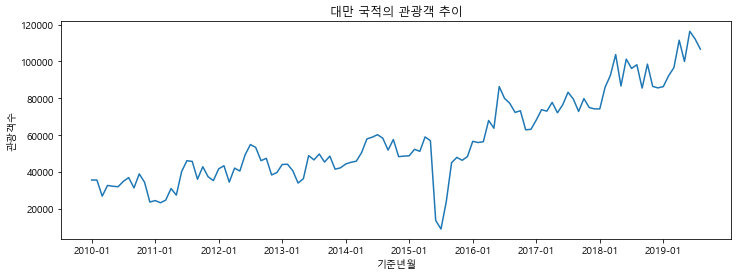

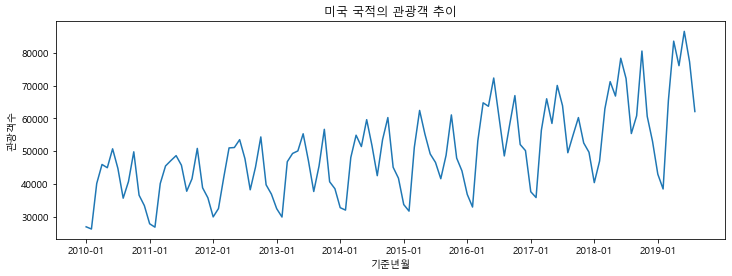

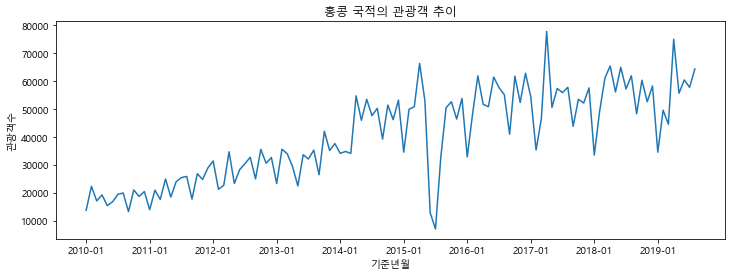

In [141]:
for cntry in cntry_list: 
    
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    ## -> X축은 기준년월 데이터 사용 , 
    ## -> Y축은 관광 데이터 사용
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', 
                '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

    ## 그래프 표현하기 
    plt.show()

# 히트맵 그래프
### 전체 데이터를 한눈에 알아보는 그래프

In [152]:
# 년월일 데이터 잇는게 제일 좋음. 년도 단위, 년도 단위 월 단위로 입국객 표현할때 히트맵 많이 쓰임.
# 좌측이 년도, 아래가 월
# 데이터의 정확성을 확인.

In [153]:
df  # 원본 확인

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,
...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0,
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,


In [158]:
# 년도와, 월을 분리시켜함. 년도 컬럼, 월 컬럼 추가.


In [162]:
del df["년도"]
del df["월"]
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [165]:
df2 = df
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,,
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,,
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,,
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,,
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,대양주,85.2,0.0,,
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,,
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,,
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,,


In [203]:
df2["기준년월"].str  # str로 기준년월의 전체 타입을 바꿔줌

# slice()

In [236]:
df["년도"] = df["기준년월"].str.slice(0,4) # 0번째 인덱스부터 4번째까지 
df["월"] = df["기준년월"].str.slice(5,7)   # 5번째 인덱스부터 7번째까지
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [242]:
df_pivot = df_filter.pivot_table(values = "관광",
                                index = "년도",
                                columns = "월",
                          #aggfunc = "sum" 년도 월별 데이터는 한건밖에 없기 때문에 무슨 옵션을 넣든 값이 똑같음.
                         )
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [244]:
import matplotlib.pyplot as plt
import seaborn as sns # 이거 쓰려면 맷플롯립이 먼저 선행되어야함.

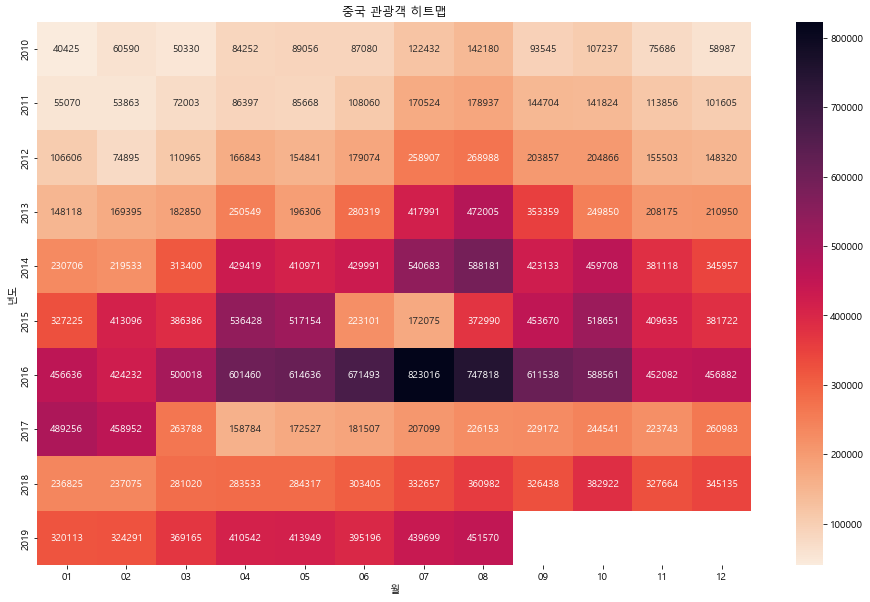

In [254]:
# 그래프 크기 설정
plt.figure(figsize = (16, 10))

# 히트맵 그래프 그리기 / 숫자0임..
sns.heatmap(df_pivot, annot = True, fmt = ".0f", cmap = "rocket_r")
# 실제 데이터를 넣어주는
# df_pivot 피봇형태로
# annot = 숫자를 표현할건지 말건지
# fmt = 포멧의 약자, 소숫점나타낼때 씀 
# cmap = 컬러맵의 약자, 로켓언더바 알이라는 색을 쓰겠다.. 인터넷 찾으면 많음 이름만 내가 원하는색으로 인터넷 찾아 바꿔주자.


# 그래프 타이틀 달기
plt.title("중국 관광객 히트맵")

# 그래프 표현
plt.show()

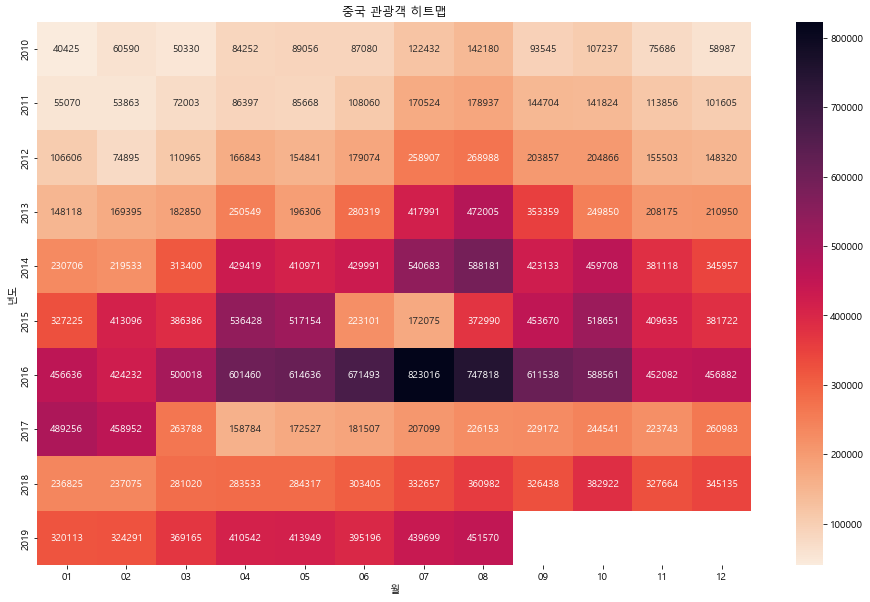

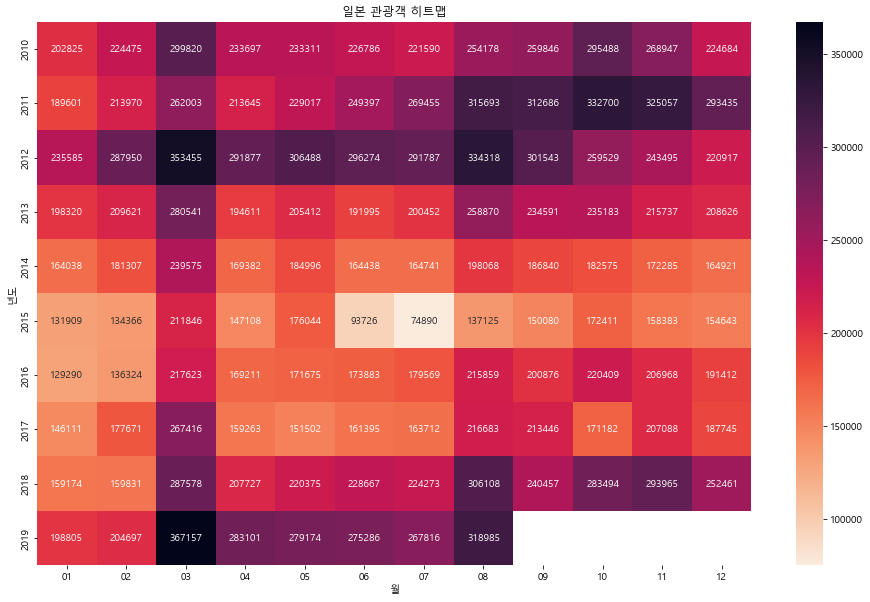

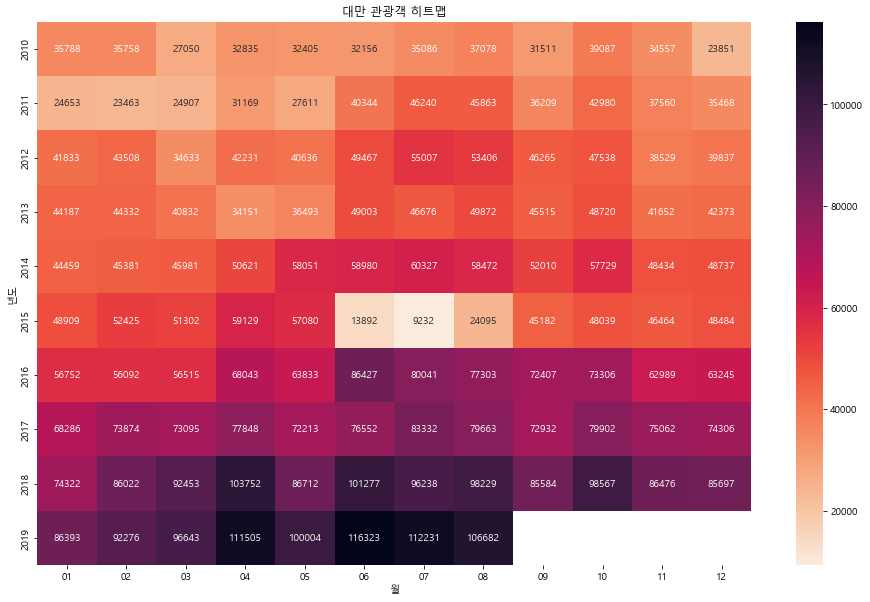

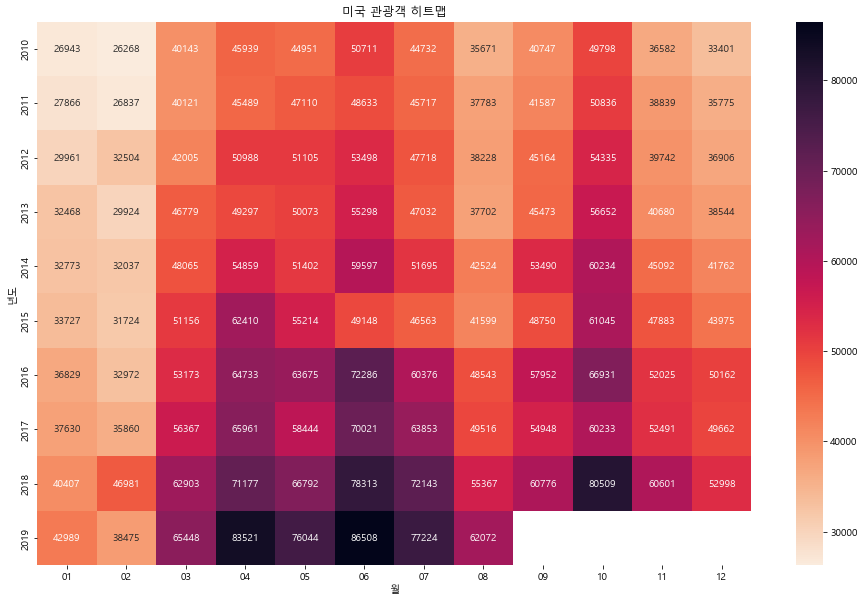

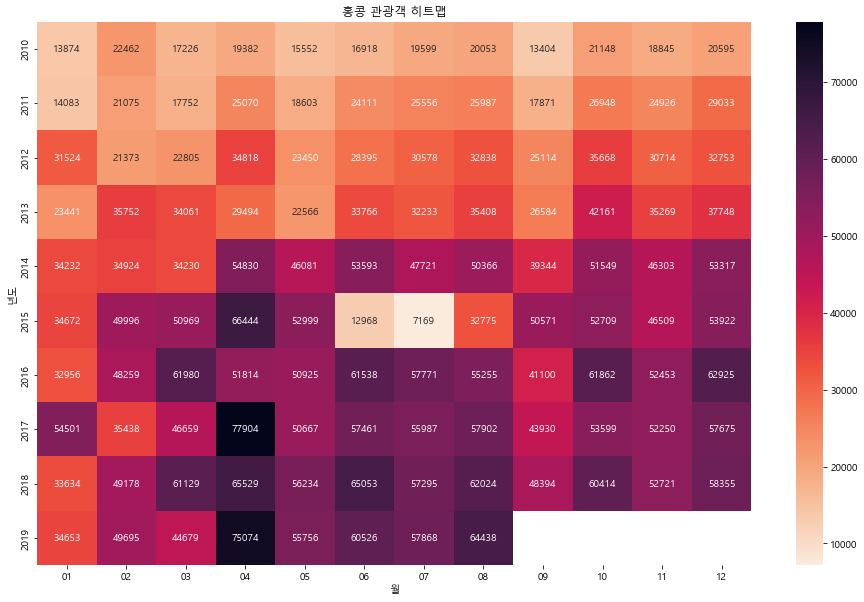

In [267]:
for cntry in cntry_list: 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광'
                             , index = '년도'
                             , columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()